-40
181119_BLG_on_HBN_-40V00001.dat
-39
None
-38
None
-37
None
-36
None
-35
181119_BLG_on_HBN_-35V00001.dat
-34
None
-33
None
-32
None
-31
None
-30
181119_BLG_on_HBN_-30V00001.dat
-29
None
-28
None
-27
None
-26
None
-25
181119_BLG_on_HBN_-25V00001.dat
-24
None
-23
None
-22
None
-21
None
-20
181119_BLG_on_HBN_-20V00001.dat
-19
None
-18
None
-17
None
-16
None
-15
181119_BLG_on_HBN_-15V00001.dat
-14
None
-13
None
-12
None
-11
None
-10
181119_BLG_on_HBN_-10V00001.dat
-9
None
-8
None
-7
None
-6
None
-5
181119_BLG_on_HBN_-5V00001.dat
-4
None
-3
None
-2
None
-1
None
0
181119_BLG_on_HBN_0V00001.dat
1
181119_BLG_on_HBN_1V00001.dat
2
181119_BLG_on_HBN_2V00001.dat
3
181119_BLG_on_HBN_3V00001.dat
4
181119_BLG_on_HBN_4V00001.dat
5
181119_BLG_on_HBN_5V00001.dat
6
181119_BLG_on_HBN_6V00001.dat
7
181119_BLG_on_HBN_7V00001.dat
8
181119_BLG_on_HBN_8V00001.dat
9
181119_BLG_on_HBN_9V00001.dat
10
181119_BLG_on_HBN_10V00001.dat
11
181119_BLG_on_HBN_11V00001.dat
12
181119_BLG_on_HBN_12V00001.dat
13
181119_BL

<Figure size 432x288 with 0 Axes>

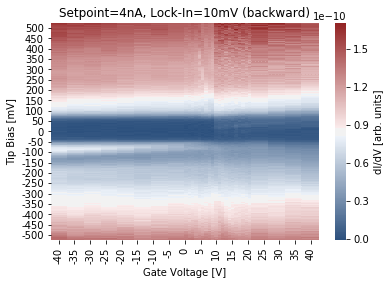

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob, re, os

plt.clf()

# _______ define all variables for plotting and importing data ________

date = "181119"          # Date prefix on the filenames 
sample = "BLG_on_HBN"     # Sample string used in the filenames 
current = "4nA"          # Approx. current setpoint of the scans
lock_in = "10mV"          # Lock-in modulation amplitude 

maxbias = 500           # Maximum bias voltage applied 
minbias = -500           # Minimum bias voltage applied

maxgate = 40             # Max. gate voltage 
mingate = -40            # Min. gate voltage 
gatestep = 1             # Look for gate voltage files beginning with mingate and going up in steps of gatestep

gateAxisInterval = 5     # Interval of tickmarks/labels on the gate axis of final plot 
biasAxisInterval = 50    # Tickmarks/label interval for the bias axis 

dir_name = "/Users/zkrebs/brarlab/data/blg_sweeps/hBN/181119_2/"   # Path for folder containing datafiles 
os.chdir(dir_name)

# ________ end definitions ________

# getFileName(int): takes a gate voltage and looks through current directory for file having this gate voltage in its name.

def getFileName(gateVoltage):
    # Gather list of .dat files that contain the right date and sample strings 
    spectrum_files = [ f for f in glob.glob("*.dat") if date in f and sample in f ] 
    for file in spectrum_files:   
        result = re.search("^.*_(-?\d*)V", file)    # Get the gate voltage in filename 
        try:
            gateVal = int(result.group(1)) 
        except:
            continue 
        if gateVal == gateVoltage: # If we found the right one, return it 
            return file 
    return None 

# ________ start main routine ________ 

gatebias = np.arange(mingate, maxgate + gatestep, gatestep)  # Generate list of gate voltages that we want to include
gate_intervals = []                                          # To account for uneven gate intervals between data points (more later...)
last_gate = mingate 

for i in range(0, int((maxgate - mingate)/gatestep) + 1):
    curr_gate = gatebias[i]
    print(curr_gate)
    datafile = getFileName(gatebias[i])
    print(datafile)
    if datafile is None:
        continue
      
    gate_intervals.append(curr_gate-last_gate)
    
    dIdV_f = np.genfromtxt( datafile, dtype=float, comments="#", usecols=(3), skip_header=19) # Extract Demod1X signal (forward direction)
    dIdV_b = np.genfromtxt( datafile, dtype=float, comments="#", usecols=(7), skip_header=19) # Backward direction   
    dIdV_avg = (dIdV_f + dIdV_b)/2
    dIdV_f_norm = np.flip(dIdV_f,axis=0)
    dIdV_b_norm = np.flip(dIdV_b,axis=0)
    dIdV_avg_norm = np.flip(dIdV_avg,axis=0)
    
    biases = np.linspace(minbias, maxbias, np.size(dIdV_avg_norm))
    
    #plt.figure()                                    # Plot and save dI/dV spectra at fixed gate voltage 
    #plt.plot(biases, np.flip(dIdV_avg_norm,axis=0), markersize=2)
    #plt.xlabel('Tip Bias [mV]')
    #plt.ylabel('dI/dV [arb. units]')
    #plt.title("Gate Voltage = " + str(curr_gate))
    #plt.savefig(date + "_gatecut_" + sample + "_" + str(curr_gate) + ".png")
    #plt.close()
    np.save()
    
    last_gate = curr_gate 
    if i == 0:
        sweep_avg = dIdV_avg_norm[0:] 
        sweep_f = dIdV_f_norm[0:] 
        sweep_b = dIdV_b_norm[0:] 
    else:
        sweep_avg = np.vstack([sweep_avg,dIdV_avg_norm[0:]])    # Stack dI/dV spetra on top of each other to make 2D array 
        sweep_f = np.vstack([sweep_f,dIdV_f_norm[0:]])
        sweep_b = np.vstack([sweep_b,dIdV_b_norm[0:]])

touse = sweep_b
gate_intervals.pop(0)                               # Duplicate gate slices in proportion to the interval 
sweep_proc = touse[0]
for i in range(0, len(gate_intervals)):
    if i == 0: k = 1
    else:      k = 0
    for j in range(0, gate_intervals[i]-k):
        sweep_proc = np.vstack([sweep_proc, touse[i]])
                          
sweep_proc = sweep_proc.transpose()                 # Transpose so axes have correct +/- orientation                           

print(np.shape(sweep_proc))
plt.figure()
cmap = sns.diverging_palette(250, 12, l = 33, as_cmap=True)                         # Plot data array as a heatmap 
ax = sns.heatmap(sweep_proc, cbar_kws={'label': 'dI/dV [arb. units]'}, cmap = cmap)

gateLabels = np.arange(mingate, maxgate + gateAxisInterval, gateAxisInterval)       # Format axis labels
numGateTicks = len(gateLabels)
biasLabels = np.arange(minbias, maxbias + biasAxisInterval, biasAxisInterval)
numBiasTicks = len(biasLabels)

print(np.shape(sweep_proc))

gateLocs = np.arange(0, np.shape(sweep_proc)[1], np.shape(sweep_proc)[1]/numGateTicks)                   
gateLocs += np.shape(sweep_proc)[1]/(2*numGateTicks)
biasLocs = np.flip(np.arange(0, np.shape(sweep_proc)[0], np.shape(sweep_proc)[0]/numBiasTicks), axis=0)
biasLocs += np.shape(sweep_proc)[0]/(2*numGateTicks)-2

plt.xticks(gateLocs, [ str(label) for label in gateLabels] )
plt.yticks(biasLocs, [ str(label) for label in biasLabels] )

plt.xlabel('Gate Voltage [V]')
plt.ylabel('Tip Bias [mV]')
plt.title("Setpoint=" + current + ", Lock-In=" + lock_in + " (backward)")
     
plt.savefig(date + "_sweep_" + sample + "_" + current + "_b.png")          # Save the raw data and plot image 
np.save(date + "_sweep_" + sample + "_" + current + "_b.npy", sweep_proc)
plt.show()
plt.close()

